In [3]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
df_raw = pd.read_csv("genetic_dataset.csv", sep=",")

In [5]:
df_main = df_raw.copy()
print("df_raw", len(df_raw))
print("df_main", len(df_main))
df_main

df_raw 1000
df_main 1000


,GENOTYPES,NAME,DFSI,DFFL,DFBO,SPAD1,SPAD2,RWC,MSI,LAI,SLW,BW,NBP,PH,SCYP,GOT,FL,UI,MIC,TENACITY
0,1,Gen_1,66,119,114,28.9,22.1,61.670344,51.086552,1.93,14.004350,1.558244,59,133,88.48,89.45,20.63,62,3.02,21.85
1,2,Gen_2,60,127,117,22.3,25.6,99.115894,40.291082,3.35,6.048587,1.169799,35,134,69.99,80.68,16.25,65,4.20,21.48
2,3,Gen_3,70,149,166,39.6,29.4,87.344650,87.729921,3.72,14.188368,1.261189,47,129,53.59,89.78,16.78,76,3.72,19.36
3,4,Gen_4,67,138,132,37.2,26.7,74.604713,71.886811,2.03,11.112441,1.676326,38,120,64.83,50.07,20.40,61,4.51,21.61
4,5,Gen_5,70,149,110,37.5,25.4,94.416901,85.531587,4.64,11.087380,1.279055,58,124,76.70,79.77,19.27,78,5.13,16.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Gen_996,61,109,139,40.3,25.9,58.125747,55.557758,3.99,14.136361,1.183610,42,150,93.20,70.45,17.02,62,4.63,21.12
996,997,Gen_997,61,143,149,44.3,27.0,97.210826,79.273660,3.55,11.082792,1.868478,58,132,67.70,64.97,16.45,68,5.21,17.49
997,998,Gen_998,68,110,127,31.8,24.0,54.466173,96.543293,4.43,14.758511,1.244847,54,148,68.69,58.04,19.51,64,5.83,20.02
998,999,Gen_999,70,129,175,33.3,21.3,56.020792,91.765236,3.58,7.687555,1.792092,39,124,58.05,56.39,20.47,69,3.84,17.63


In [6]:
corr = df_main.iloc[:,2:].corr()
corr

,DFSI,DFFL,DFBO,SPAD1,SPAD2,RWC,MSI,LAI,SLW,BW,NBP,PH,SCYP,GOT,FL,UI,MIC,TENACITY
DFSI,1.000000,0.043990,-0.015516,0.020228,0.002840,0.031324,-0.012530,0.023959,-0.012874,0.020925,0.001115,0.036834,-0.021904,0.008788,0.019961,0.009427,0.022492,0.020201
DFFL,0.043990,1.000000,0.014079,-0.023068,0.005134,-0.016042,0.000218,-0.017194,-0.038456,0.013056,-0.001168,-0.073827,-0.026095,0.003952,0.008807,0.017936,-0.038861,-0.025458
DFBO,-0.015516,0.014079,1.000000,-0.011579,-0.009390,-0.030824,0.042972,0.009572,-0.054858,-0.000015,0.008355,-0.036260,-0.021351,-0.029037,0.016106,-0.054737,-0.002661,0.024160
SPAD1,0.020228,-0.023068,-0.011579,1.000000,0.025420,0.005135,-0.006734,0.021802,0.045985,-0.029458,0.021208,-0.005555,0.011937,0.040739,-0.001874,-0.030416,-0.002772,-0.010567
SPAD2,0.002840,0.005134,-0.009390,0.025420,1.000000,-0.034397,0.040956,-0.021882,-0.014885,-0.060234,0.029252,0.000627,-0.071367,0.035979,-0.022141,0.032966,-0.009425,0.047400
RWC,0.031324,-0.016042,-0.030824,0.005135,-0.034397,1.000000,-0.013146,-0.012625,-0.026743,0.008950,0.022783,0.024301,0.006555,-0.039143,0.017138,-0.000483,0.026499,0.043912
MSI,-0.012530,0.000218,0.042972,-0.006734,0.040956,-0.013146,1.000000,-0.019812,0.023158,-0.005206,0.003740,-0.024530,0.020843,-0.021329,0.041500,-0.010340,0.014101,0.024903
LAI,0.023959,-0.017194,0.009572,0.021802,-0.021882,-0.012625,-0.019812,1.000000,0.008490,-0.014649,-0.006470,0.018676,-0.042573,-0.003873,-0.010248,0.005300,-0.029998,-0.017701
SLW,-0.012874,-0.038456,-0.054858,0.045985,-0.014885,-0.026743,0.023158,0.008490,1.000000,0.038362,0.007817,-0.004933,0.003927,0.014369,0.052897,-0.031781,-0.050051,0.004958
BW,0.020925,0.013056,-0.000015,-0.029458,-0.060234,0.008950,-0.005206,-0.014649,0.038362,1.000000,-0.005017,-0.022320,-0.035495,-0.054854,-0.015627,0.003223,0.031380,0.029570


<AxesSubplot:>

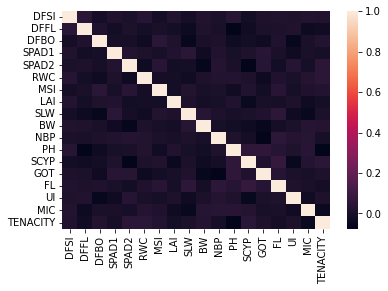

In [7]:
sns.heatmap(corr)

In [8]:
pca = PCA(n_components=13)
pca.fit(corr)

PCA(n_components=13)